In [ ]:
### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
### 2. Prepare data ###

!scp '/content/gdrive/My Drive/comvis/data.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
 extracting: /content/test/images/cardboard396_jpg.rf.fb76c5a28057d42886c70e836a5f8660.jpg  
 extracting: /content/test/images/cardboard63_jpg.rf.e8b066437731ba0197b4e8f530317adc.jpg  
 extracting: /content/test/images/cardboard69_jpg.rf.96a2bd9230ba1716c37862930228599c.jpg  
 extracting: /content/test/images/cardboard70_jpg.rf.6658d17c9c675b230ff683f5b1cf0945.jpg  
 extracting: /content/test/images/cardboard73_jpg.rf.7ae241d5654fca1be25ac162c906938a.jpg  
 extracting: /content/test/images/cardboard76_jpg.rf.78841b2438fb79f249e2a464c8587f24.jpg  
 extracting: /content/test/images/glass122_jpg.rf.986be5d9502e97bae857145c3b5172da.jpg  
 extracting: /content/test/images/glass126_jpg.rf.e126b28c100c96edbca2a0dd4b74be48.jpg  
 extracting: /content/test/images/glass128_jpg.rf.f62b1f31ec68d208517ef0fc3d211502.jpg  
 extracting: /content/test/images/glass133_jpg.rf.98c46a035ee9dbe3ef2e11f55370acf6.jpg  
 extracting: /content/test/images/glass1

In [ ]:
### 3. Install packages ###

!git clone https://github.com/autogyro/yolo-V8.git
!cd yolov8 && pip install .

Cloning into 'yolo-V8'...
remote: Enumerating objects: 2723, done.
remote: Total 2723 (delta 0), reused 0 (delta 0), pack-reused 2723 (from 1)
Receiving objects: 100% (2723/2723), 1.41 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (1855/1855), done.
/bin/bash: line 1: cd: yolov8: No such file or directory


In [ ]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 20.3 MB/s eta 0:00:00


In [ ]:
### 4. Train model ###

import os

from ultralytics import YOLO


config_path = '/content/data.yaml'

# # Load a model
model = YOLO("yolov8m.pt")  # load pre trained model

# Use the model
model.train(data=config_path, epochs=30, batch=32)  # train the model


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 148MB/s]


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 1762 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1762/1762 [00:01<00:00, 1665.52it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 503 images, 0 backgrounds, 0 corrupt: 100%|██████████| 503/503 [00:00<00:00, 962.74it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      13.6G      0.664      2.238      1.264          6        640: 100%|██████████| 56/56 [01:01<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]

                   all        503        506      0.285      0.339      0.219      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      13.6G     0.7797      1.602      1.318          7        640: 100%|██████████| 56/56 [00:58<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        503        506      0.219      0.314      0.206      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      13.5G     0.7699      1.507      1.301          8        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        503        506      0.156      0.179     0.0826     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      13.5G     0.8003      1.484      1.326          7        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        503        506     0.0101     0.0773    0.00739    0.00251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      13.5G     0.7405      1.414      1.279          4        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.14it/s]

                   all        503        506      0.407      0.477      0.461      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      13.5G     0.7017      1.273      1.248          7        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        503        506      0.455      0.582      0.497       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      13.5G     0.6637      1.223      1.229          8        640: 100%|██████████| 56/56 [00:58<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        503        506      0.491      0.676      0.641      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      13.5G     0.6528      1.159      1.216          5        640: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]

                   all        503        506      0.447      0.527      0.475       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      13.5G     0.6371      1.144      1.203          8        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        503        506      0.635      0.576      0.615      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      13.5G     0.6121      1.097      1.195          8        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        503        506      0.696      0.656      0.708      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      13.5G     0.5601      1.026      1.174          6        640: 100%|██████████| 56/56 [00:58<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        503        506      0.692      0.743      0.735      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      13.5G     0.5586      1.008      1.163          8        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        503        506       0.63       0.73      0.732       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      13.5G     0.5539      1.015      1.159          6        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        503        506      0.762      0.716      0.784      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      13.5G     0.5405     0.9312       1.16          9        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        503        506      0.746      0.684      0.759      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      13.5G     0.4986     0.9005       1.13          6        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]

                   all        503        506      0.747       0.73       0.81      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      13.5G     0.5094     0.9124      1.142          6        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]

                   all        503        506      0.781      0.761      0.846      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      13.5G     0.5013     0.8612      1.122          8        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        503        506      0.789      0.797      0.856      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      13.5G     0.5007     0.8646      1.134          7        640: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        503        506      0.707      0.822      0.823      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      13.5G     0.4873     0.8412      1.126          5        640: 100%|██████████| 56/56 [00:57<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        503        506      0.727      0.773      0.823      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      13.5G     0.4781      0.842      1.117          6        640: 100%|██████████| 56/56 [00:58<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        503        506      0.801       0.79       0.87      0.829


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      13.5G     0.2639     0.6357     0.9953          2        640: 100%|██████████| 56/56 [00:58<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        503        506      0.798      0.776      0.853      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      13.5G     0.2649     0.5842     0.9924          2        640: 100%|██████████| 56/56 [00:56<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        503        506      0.788      0.746      0.862      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      13.5G     0.2674     0.5562       1.03          2        640: 100%|██████████| 56/56 [00:56<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        503        506      0.793      0.781      0.866      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      13.5G     0.2539     0.5635     0.9867          5        640: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        503        506      0.849      0.797      0.877      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      13.5G     0.2323     0.4865     0.9671          2        640: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        503        506      0.848      0.831      0.891      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      13.5G     0.2202     0.4798     0.9595          2        640: 100%|██████████| 56/56 [00:56<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]

                   all        503        506       0.83      0.736      0.857      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      13.5G     0.2165      0.415     0.9654          2        640: 100%|██████████| 56/56 [00:56<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        503        506      0.802      0.847      0.895      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      13.5G     0.1996     0.3858     0.9453          2        640: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]

                   all        503        506      0.841      0.887      0.918      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      13.5G     0.1911     0.3529     0.9427          2        640: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        503        506      0.852      0.837      0.913        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      13.5G     0.1771     0.3208     0.9248          2        640: 100%|██████████| 56/56 [00:57<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        503        506      0.849      0.871      0.918      0.906



30 epochs completed in 0.570 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


                   all        503        506      0.848      0.871      0.917      0.905
                 Metal         74         74      0.823      0.878      0.934      0.931
                 Paper        125        127      0.933      0.906      0.957      0.942
               Plastic        102        102      0.894      0.804      0.926      0.913
          Random Trash         25         26      0.674      0.808      0.777      0.766
             cardboard         82         82      0.894      0.976      0.985      0.982
                 glass         95         95      0.871      0.856      0.922      0.899
Speed: 0.2ms preprocess, 9.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be710ab82e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
### 5. Download results ###

from google.colab import files


!zip -r /content/runs.zip /content/runs

files.download('/content/runs.zip')


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/PR_curve.png (deflated 13%)
  adding: content/runs/detect/train/F1_curve.png (deflated 7%)
  adding: content/runs/detect/train/train_batch1122.jpg (deflated 12%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/P_curve.png (deflated 8%)
  adding: content/runs/detect/train/labels.jpg (deflated 25%)
  adding: content/runs/detect/train/train_batch1120.jpg (deflated 10%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 8%)
  adding: content/runs/detect/train/results.csv (deflated 59%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 21%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 14%)
  ad

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
### 2. Prepare data ###

!scp '/content/runs8.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

Archive:  /content/data.zip
   creating: /content/content8/runs/
   creating: /content/content8/runs/detect/
   creating: /content/content8/runs/detect/train/
  inflating: /content/content8/runs/detect/train/args.yaml  
  inflating: /content/content8/runs/detect/train/confusion_matrix.png  
  inflating: /content/content8/runs/detect/train/confusion_matrix_normalized.png  
  inflating: /content/content8/runs/detect/train/events.out.tfevents.1734432152.d17c542dd954.254.0  
  inflating: /content/content8/runs/detect/train/F1_curve.png  
  inflating: /content/content8/runs/detect/train/labels.jpg  
  inflating: /content/content8/runs/detect/train/labels_correlogram.jpg  
  inflating: /content/content8/runs/detect/train/P_curve.png  
  inflating: /content/content8/runs/detect/train/PR_curve.png  
  inflating: /content/content8/runs/detect/train/R_curve.png  
  inflating: /content/content8/runs/detect/train/results.csv  
  inflating: /content/content8/runs/detect/train/results.png  
  inflat

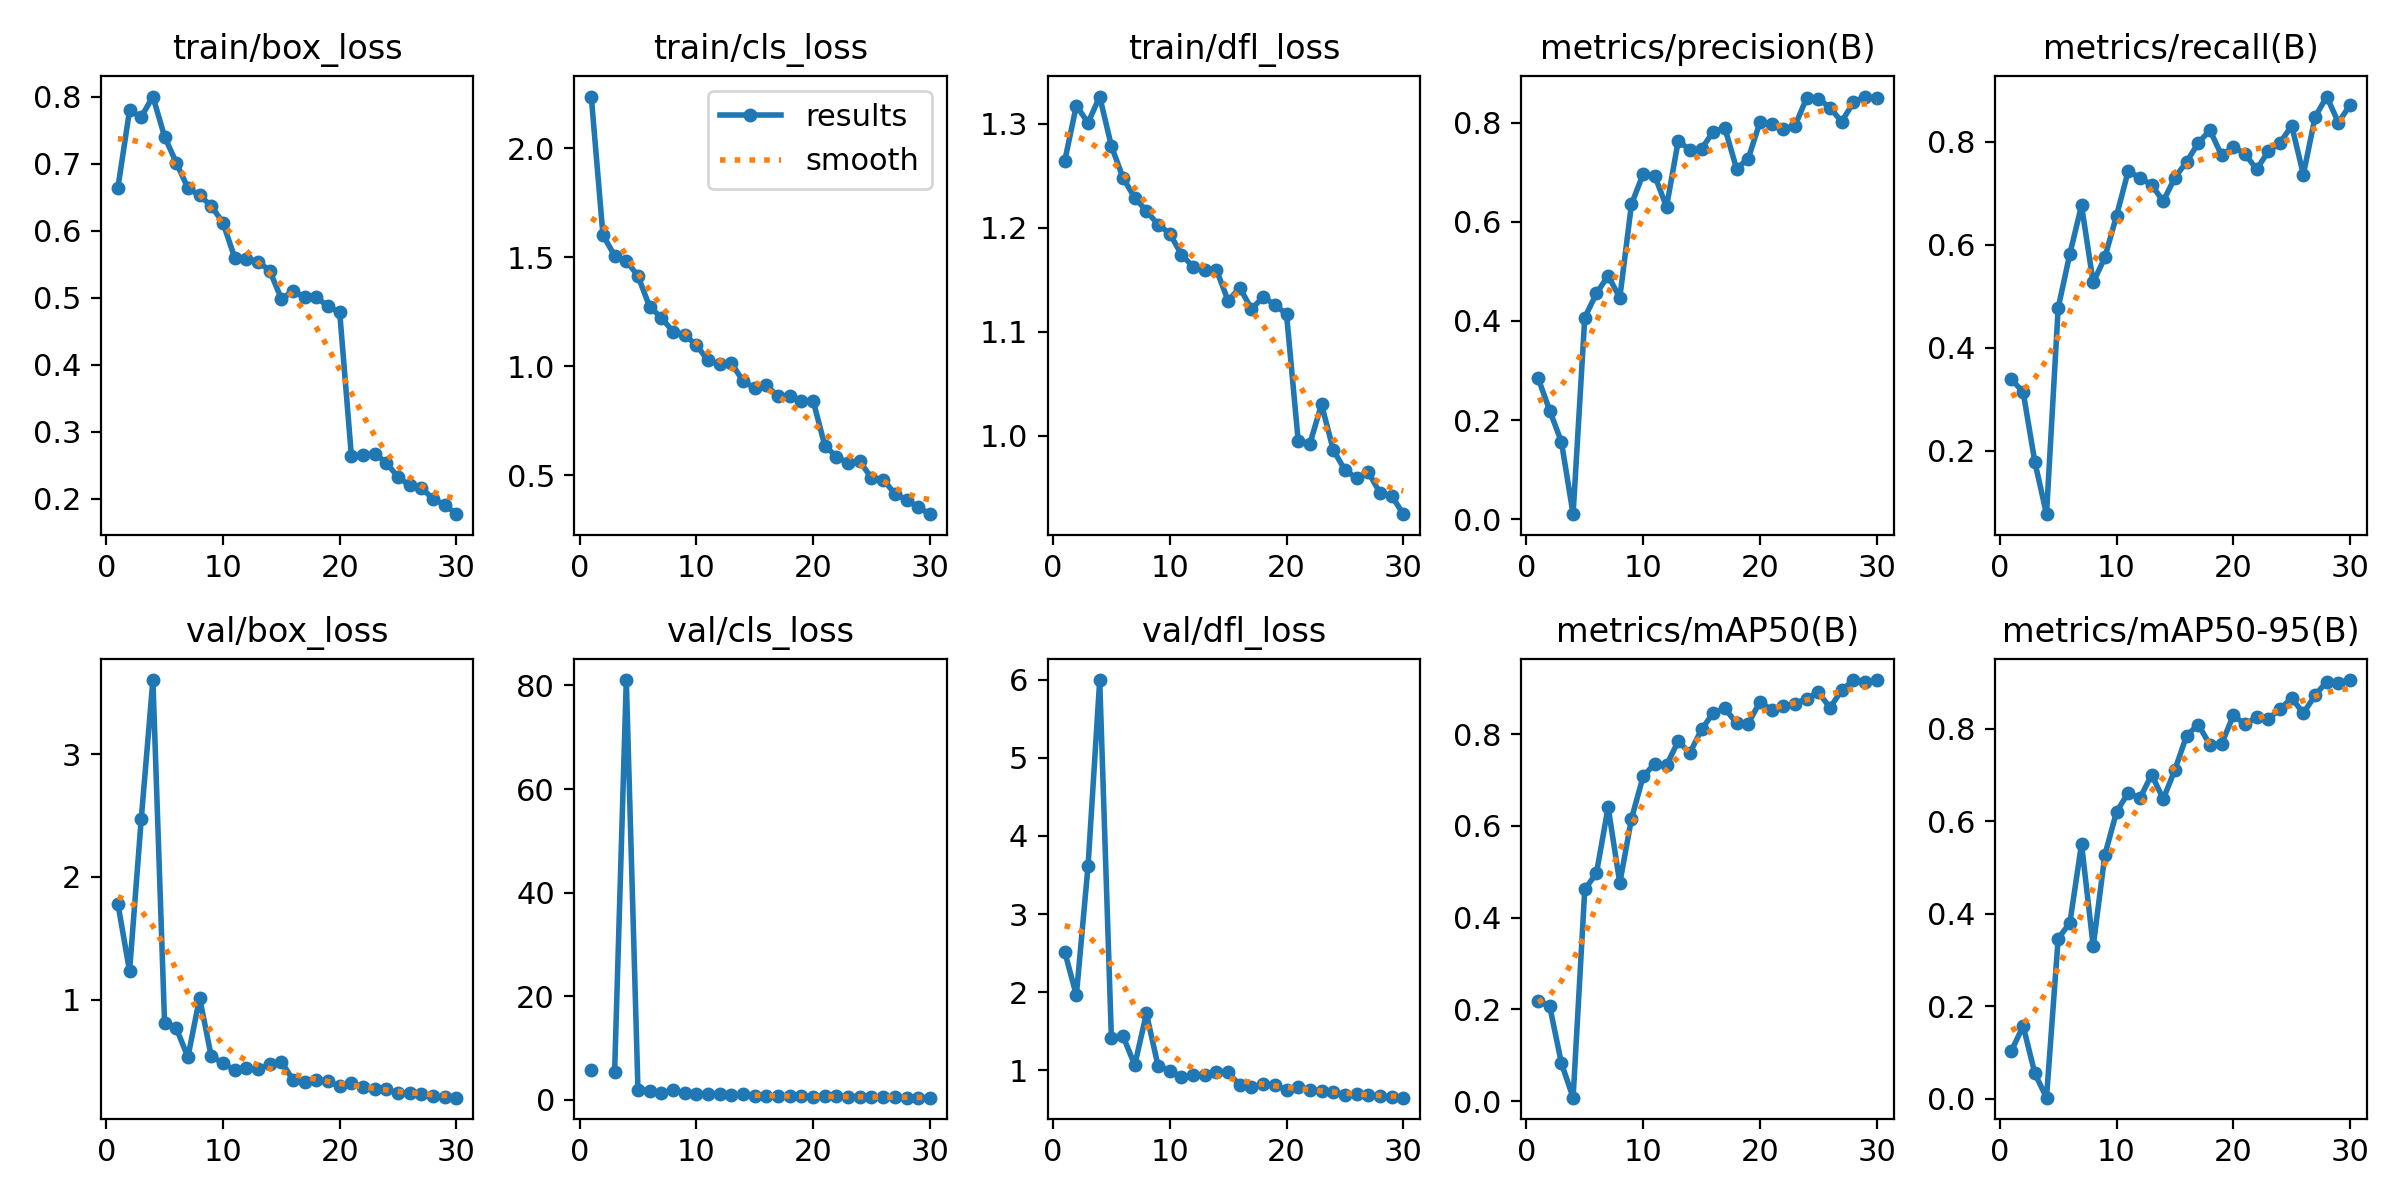

In [4]:
from IPython.display import Image
Image("/content/content/runs/detect/train/results.png")


image 1/1 /content/gambartest1.jpg: 640x640 1 cardboard, 37.0ms
Speed: 5.4ms preprocess, 37.0ms inference, 808.3ms postprocess per image at shape (1, 3, 640, 640)


array([[[104,  31,  17],
        [104,  31,  17],
        [104,  31,  17],
        ...,
        [209, 207, 206],
        [209, 207, 206],
        [209, 207, 206]],

       [[104,  31,  17],
        [104,  31,  17],
        [104,  31,  17],
        ...,
        [209, 207, 206],
        [209, 207, 206],
        [209, 207, 206]],

       [[104,  31,  17],
        [104,  31,  17],
        [104,  31,  17],
        ...,
        [209, 207, 206],
        [209, 207, 206],
        [209, 207, 206]],

       ...,

       [[104,  31,  17],
        [104,  31,  17],
        [104,  31,  17],
        ...,
        [133, 164, 165],
        [133, 164, 165],
        [133, 164, 165]],

       [[104,  31,  17],
        [104,  31,  17],
        [104,  31,  17],
        ...,
        [133, 164, 165],
        [133, 164, 165],
        [133, 164, 165]],

       [[104,  31,  17],
        [104,  31,  17],
        [104,  31,  17],
        ...,
        [133, 164, 165],
        [133, 164, 165],
        [133, 164, 165]]], dtype=uint8)
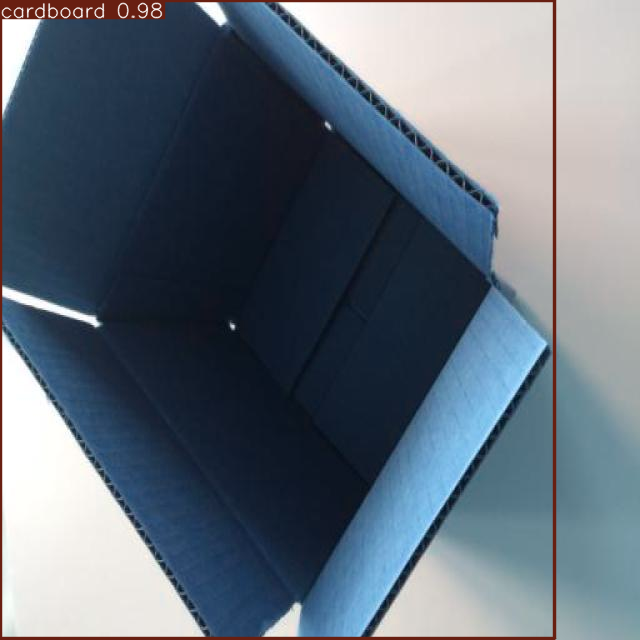

In [6]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest1.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest2.jpg: 640x640 1 glass, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


array([[[255, 245, 245],
        [255, 245, 245],
        [255, 245, 245],
        ...,
        [227, 215, 215],
        [227, 215, 215],
        [227, 215, 215]],

       [[255, 245, 245],
        [255, 245, 245],
        [255, 245, 245],
        ...,
        [227, 215, 215],
        [227, 215, 215],
        [227, 215, 215]],

       [[255, 245, 245],
        [255, 245, 245],
        [255, 245, 245],
        ...,
        [227, 215, 215],
        [227, 215, 215],
        [227, 215, 215]],

       ...,

       [[255, 245, 245],
        [255, 245, 245],
        [255, 245, 245],
        ...,
        [225, 213, 213],
        [225, 213, 213],
        [225, 213, 213]],

       [[255, 245, 245],
        [255, 245, 245],
        [255, 245, 245],
        ...,
        [225, 213, 213],
        [225, 213, 213],
        [225, 213, 213]],

       [[255, 245, 245],
        [255, 245, 245],
        [255, 245, 245],
        ...,
        [225, 213, 213],
        [225, 213, 213],
        [225, 213, 213]]], dtype=uint8)
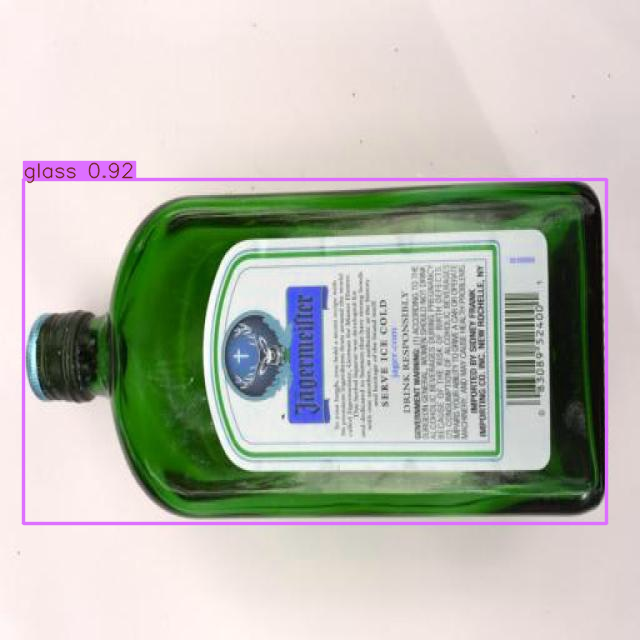

In [7]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest2.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest3.jpg: 640x640 1 Metal, 37.0ms
Speed: 1.7ms preprocess, 37.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


array([[[239, 241, 241],
        [239, 241, 241],
        [239, 241, 241],
        ...,
        [227, 230, 228],
        [227, 230, 228],
        [226, 229, 227]],

       [[239, 241, 241],
        [239, 241, 241],
        [239, 241, 241],
        ...,
        [227, 230, 228],
        [227, 230, 228],
        [226, 229, 227]],

       [[239, 241, 241],
        [239, 241, 241],
        [239, 241, 241],
        ...,
        [227, 230, 228],
        [227, 230, 228],
        [226, 229, 227]],

       ...,

       [[233, 238, 236],
        [233, 238, 236],
        [233, 238, 236],
        ...,
        [215, 218, 216],
        [215, 218, 216],
        [215, 218, 216]],

       [[233, 238, 236],
        [233, 238, 236],
        [233, 238, 236],
        ...,
        [215, 218, 216],
        [215, 218, 216],
        [215, 218, 216]],

       [[233, 238, 236],
        [233, 238, 236],
        [233, 238, 236],
        ...,
        [215, 218, 216],
        [215, 218, 216],
        [215, 218, 216]]], dtype=uint8)
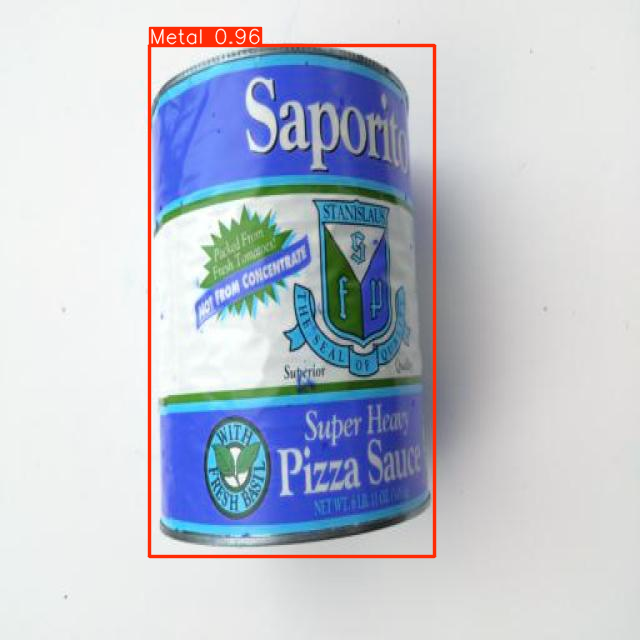

In [11]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest3.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest4.jpg: 640x640 1 Paper, 37.0ms
Speed: 1.4ms preprocess, 37.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


array([[[234, 232, 231],
        [234, 232, 231],
        [234, 232, 231],
        ...,
        [209, 209, 209],
        [208, 208, 208],
        [207, 207, 207]],

       [[234, 232, 231],
        [234, 232, 231],
        [234, 232, 231],
        ...,
        [209, 209, 209],
        [208, 208, 208],
        [207, 207, 207]],

       [[234, 232, 231],
        [234, 232, 231],
        [234, 232, 231],
        ...,
        [209, 209, 209],
        [208, 208, 208],
        [207, 207, 207]],

       ...,

       [[187, 191, 192],
        [187, 191, 192],
        [187, 191, 192],
        ...,
        [162, 166, 167],
        [161, 165, 166],
        [161, 165, 166]],

       [[187, 191, 192],
        [187, 191, 192],
        [187, 191, 192],
        ...,
        [162, 166, 167],
        [161, 165, 166],
        [161, 165, 166]],

       [[187, 191, 192],
        [187, 191, 192],
        [187, 191, 192],
        ...,
        [162, 166, 167],
        [161, 165, 166],
        [161, 165, 166]]], dtype=uint8)
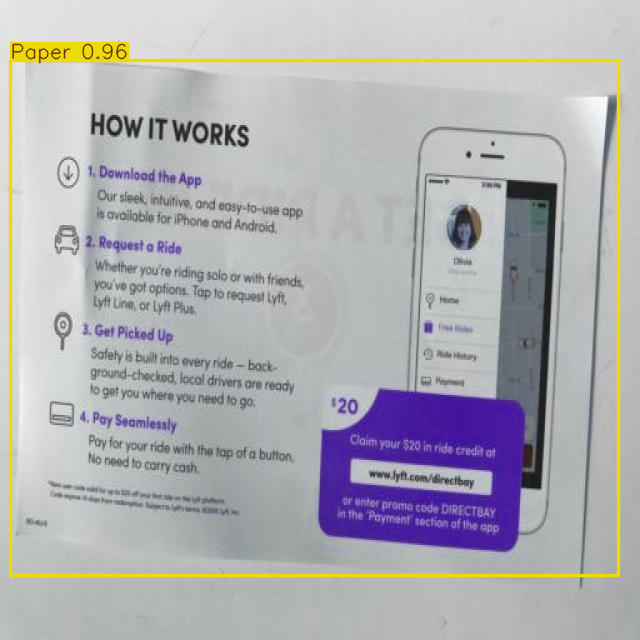

In [9]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest4.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest5.jpg: 640x640 1 Plastic, 36.9ms
Speed: 2.1ms preprocess, 36.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


array([[[210, 219, 229],
        [210, 219, 229],
        [210, 219, 229],
        ...,
        [160, 161, 175],
        [161, 162, 176],
        [161, 162, 176]],

       [[210, 219, 229],
        [210, 219, 229],
        [211, 220, 230],
        ...,
        [161, 162, 176],
        [161, 162, 176],
        [161, 162, 176]],

       [[210, 219, 229],
        [211, 220, 230],
        [211, 220, 230],
        ...,
        [161, 162, 176],
        [161, 162, 176],
        [161, 162, 176]],

       ...,

       [[214, 221, 238],
        [214, 221, 238],
        [214, 221, 238],
        ...,
        [135, 139, 140],
        [135, 139, 140],
        [135, 139, 140]],

       [[214, 221, 238],
        [214, 221, 238],
        [214, 221, 238],
        ...,
        [135, 139, 140],
        [135, 139, 140],
        [135, 139, 140]],

       [[214, 221, 238],
        [214, 221, 238],
        [214, 221, 238],
        ...,
        [135, 139, 140],
        [135, 139, 140],
        [135, 139, 140]]], dtype=uint8)
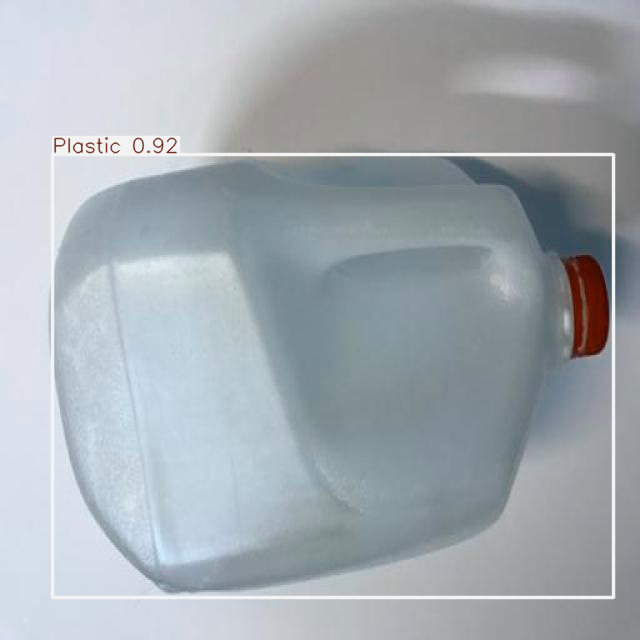

In [10]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest5.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()
